In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv("C:/Users/acer/Downloads/amazon_prime_titles.csv")

In [99]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [100]:
df.shape

(9668, 12)

In [101]:
df.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [107]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [108]:
df['director'].value_counts()

Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
                        ... 
Steve Horn                 1
Naresh Malhotra            1
Tim Kirkby                 1
Sukesh Mijar               1
Edoardo Winspeare          1
Name: director, Length: 5774, dtype: int64

In [109]:
df['director'].mode()

0    Mark Knight
dtype: object

In [128]:
df['director'] = df['director'].fillna(df['director']=='Not Available')

In [129]:
df['cast'].unique()

array(['Brendan Gleeson, Taylor Kitsch, Gordon Pinsent',
       'Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar',
       'Tom Sizemore, Lorenzo Lamas, Robert LaSardo, Richard Jones, Yancey Arias, Noel Gugliemi',
       ...,
       'Ray Stevenson, Julian Wadham, Richard Brake, Michael Smiley, Enoch Frost',
       'Esteban Recagno, Ezequiel Stremiz, Luciano Vittori, Pablo Rodríguez Albi, Leonard Kunz, Juanma Muniagurria, Julieta Cardinali, Nazareno Casero, Rita Cortese, Laura Esquivel, Nicolás Furtado, Nicolas Goldschmidt',
       'Michael Caine, Emily Mortimer, Joseph Gilgun, Sean Harris'],
      dtype=object)

In [112]:
df['cast'].mode()

0    Maggie Binkley
dtype: object

In [130]:
df['cast'] = df['cast'].fillna(df['cast']=='Not Available')

In [114]:
df['rating'].mode()

0    13+
dtype: object

In [115]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [131]:
df['rating'].value_counts()

13+         2454
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
AGES_18_       3
NOT_RATE       3
NC-17          3
AGES_16_       2
ALL_AGES       1
16             1
Name: rating, dtype: int64

In [118]:
df['country'].value_counts()

United States                            253
India                                    229
United Kingdom                            28
Canada                                    16
United Kingdom, United States             12
                                        ... 
United States, Italy                       1
United States, Thailand                    1
France, United States                      1
United States, United Kingdom, Canada      1
Iran, France                               1
Name: country, Length: 86, dtype: int64

In [119]:
df['country'] = df['country'].fillna('Not Available')

In [122]:
df['date_added'].value_counts()

March 30, 2021        14
August 27, 2021        6
June 3, 2021           4
September 17, 2021     4
October 2, 2021        4
                      ..
August 15, 2021        1
July 1, 2021           1
October 4, 2021        1
June 20, 2021          1
April 24, 2021         1
Name: date_added, Length: 84, dtype: int64

In [123]:
from datetime import datetime as dt

In [124]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       9668 non-null   object        
 1   type          9668 non-null   object        
 2   title         9668 non-null   object        
 3   director      9668 non-null   object        
 4   cast          9668 non-null   object        
 5   country       9668 non-null   object        
 6   date_added    155 non-null    datetime64[ns]
 7   release_year  9668 non-null   int64         
 8   rating        9668 non-null   object        
 9   duration      9668 non-null   object        
 10  listed_in     9668 non-null   object        
 11  description   9668 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 906.5+ KB


In [139]:
df['date_added'].mode()

0   2021-03-30
dtype: datetime64[ns]

In [140]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

In [143]:
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

In [144]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year            0
month           0
dtype: int64

In [45]:
df['show_id'].unique()

array(['s1', 's2', 's3', ..., 's9666', 's9667', 's9668'], dtype=object)

In [46]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [47]:
df['title'].unique()

array(['The Grand Seduction', 'Take Care Good Night',
       'Secrets of Deception', ..., 'Outpost', 'Maradona: Blessed Dream',
       'Harry Brown'], dtype=object)

In [48]:
df['director'].unique()

array(['Don McKellar', 'Girish Joshi', 'Josh Webber', ...,
       'John-Paul Davidson, Stephen Warbeck', 'Emily Skye',
       'Steve Barker'], dtype=object)

In [49]:
df['cast'].unique()

array(['Brendan Gleeson, Taylor Kitsch, Gordon Pinsent',
       'Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar',
       'Tom Sizemore, Lorenzo Lamas, Robert LaSardo, Richard Jones, Yancey Arias, Noel Gugliemi',
       ...,
       'Ray Stevenson, Julian Wadham, Richard Brake, Michael Smiley, Enoch Frost',
       'Esteban Recagno, Ezequiel Stremiz, Luciano Vittori, Pablo Rodríguez Albi, Leonard Kunz, Juanma Muniagurria, Julieta Cardinali, Nazareno Casero, Rita Cortese, Laura Esquivel, Nicolás Furtado, Nicolas Goldschmidt',
       'Michael Caine, Emily Mortimer, Joseph Gilgun, Sean Harris'],
      dtype=object)

In [50]:
df['release_year'].unique()

array([2014, 2018, 2017, 1989, 2016, 1994, 2020, 2019, 2008, 2001, 1941,
       1991, 2005, 2015, 2011, 2013, 1949, 2007, 2002, 1955, 1959, 1983,
       2009, 2012, 2010, 1986, 1988, 1920, 1936, 1992, 2021, 1993, 2006,
       1948, 1946, 1944, 1935, 1985, 1937, 1970, 1945, 1939, 1996, 1997,
       1974, 1938, 1978, 2004, 1943, 1975, 1960, 1934, 1940, 1961, 2003,
       2000, 1967, 1995, 1951, 1932, 1999, 1963, 1969, 1952, 1947, 1929,
       1990, 1925, 1968, 1987, 1942, 1979, 1980, 1981, 1976, 1966, 1973,
       1956, 1972, 1950, 1953, 1982, 1977, 1933, 1958, 1984, 1998, 1924,
       1922, 1926, 1954, 1930, 1971, 1965, 1931, 1923, 1962, 1964, 1957,
       1927], dtype=int64)

In [51]:
df['rating'].unique()

array(['13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+', 'TV-PG',
       '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G', 'PG',
       'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

In [52]:
df['duration'].unique()

array(['113 min', '110 min', '74 min', '69 min', '45 min', '52 min',
       '98 min', '131 min', '87 min', '92 min', '88 min', '93 min',
       '94 min', '46 min', '96 min', '1 Season', '104 min', '62 min',
       '50 min', '3 Seasons', '2 Seasons', '86 min', '36 min', '37 min',
       '103 min', '9 min', '18 min', '14 min', '20 min', '19 min',
       '22 min', '60 min', '6 min', '54 min', '5 min', '84 min',
       '126 min', '125 min', '109 min', '89 min', '85 min', '56 min',
       '40 min', '111 min', '33 min', '34 min', '95 min', '99 min',
       '78 min', '4 Seasons', '77 min', '55 min', '53 min', '115 min',
       '58 min', '49 min', '135 min', '91 min', '64 min', '59 min',
       '48 min', '122 min', '90 min', '102 min', '65 min', '114 min',
       '136 min', '70 min', '138 min', '100 min', '480 min', '4 min',
       '30 min', '152 min', '68 min', '57 min', '7 Seasons', '31 min',
       '151 min', '149 min', '9 Seasons', '141 min', '121 min', '79 min',
       '140 min', '51 min'

In [53]:
df['listed_in'].unique()

array(['Comedy, Drama', 'Drama, International', 'Action, Drama, Suspense',
       'Documentary', 'Drama, Fantasy', 'Fantasy, Kids',
       'Documentary, Special Interest', 'Comedy',
       'Action, Science Fiction, Suspense', 'Drama', 'Adventure, Kids',
       'Horror, Suspense', 'Documentary, Sports',
       'Horror, Science Fiction', 'Kids, Special Interest',
       'Comedy, Talk Show and Variety', 'Science Fiction', 'Kids',
       'Action, Anime, Comedy',
       'Arts, Entertainment, and Culture, Comedy, Drama', 'TV Shows',
       'Animation, Anime, Fantasy', 'Action, Adventure, Animation',
       'Anime, Kids', 'Music Videos and Concerts', 'Drama, Suspense',
       'Fitness, Special Interest',
       'Faith and Spirituality, Special Interest', 'Special Interest',
       'Fitness', 'Action, Military and War, Western',
       'Arts, Entertainment, and Culture, Comedy, Talk Show and Variety',
       'Action, Western', 'Documentary, Science Fiction',
       'Adventure, Animation, Kids'

In [54]:
df['description'].unique()

array(["A small fishing village must procure a local doctor to secure a lucrative business contract. When unlikely candidate and big city doctor Paul Lewis lands in their lap for a trial residence, the townsfolk rally together to charm him into staying. As the doctor's time in the village winds to a close, acting mayor Murray French has no choice but to pull out all the stops.",
       'A Metro Family decides to fight a Cyber Criminal threatening their stability and pride.',
       'After a man discovers his wife is cheating on him with a neighborhood kid he goes down a furious path of self-destruction',
       ...,
       'In war-torn Eastern Europe, a world-weary group of mercenaries discover a long-hidden secret in an abandoned WWII bunker.',
       'The series tells the story of Diego Maradona, a boy from an Argentine villa who turned into the legendary soccer star.',
       "Harry Brown, starring two-time Academy Award winner Michael Caine, follows one man's journey through a chao

In [148]:
df['type'].value_counts()

Movie      7814
TV Show    1854
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='Count'>

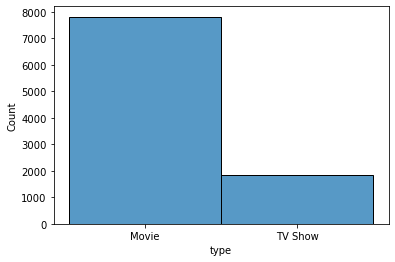

In [149]:
sns.histplot(df['type'])

In [150]:
df.groupby(['country'])['director'].value_counts()

country                                    director          
Afghanistan, France                        Louis Meunier         1
Australia                                  Caro Meldrum-Hanna    1
                                           Pete Gleeson          1
                                           Rolf de Heer          1
                                           Sonia Bible           1
                                                                ..
United States, United Kingdom              Robert Zemeckis       1
                                           Stephen Metcalfe      1
United States, United Kingdom, Canada      Mark Knight           1
United States, United Kingdom, Germany     Ben Stiller           1
United States, United Kingdom, Kazakhstan  Larry Charles         1
Name: director, Length: 5904, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='Count'>

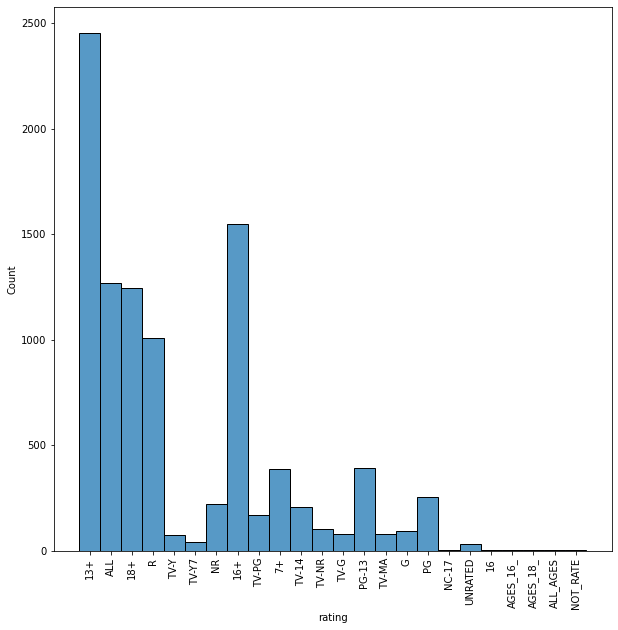

In [151]:
plt.figure(figsize=(10,10))
plt.xticks(rotation='vertical')
sns.histplot(df['rating'])

In [55]:
a = df.iloc[np.where(df['type']=='TV Show')]

In [56]:
a

,show_id,type,title,director,cast,release_year,rating,duration,listed_in,description
17,s18,TV Show,Zoo Babies,Mark Knight,Narrator - Gillian Barlett,2008,ALL,1 Season,"Kids, Special Interest",A heart warming and inspiring series that welc...
18,s19,TV Show,Zoë Coombs Marr: Bossy Bottom,Mark Knight,Zoë Coombs Marr,2020,18+,1 Season,"Comedy, Talk Show and Variety",Zoë Coombs Marr has been on hiatus. Sort of. F...
20,s21,TV Show,Zoboomafoo,Mark Knight,Maggie Binkley,2001,TV-Y,1 Season,Kids,Chris and Martin Kratt bring their enthusiasm ...
21,s22,TV Show,Zo Zo Zombie: Mini-Series,Mark Knight,"Alex Cazares, Ben Diskin, Cristina Vee, Erika ...",2020,TV-Y7,1 Season,"Action, Anime, Comedy","Zo Zo Zombie is our undead hero who, with his ..."
23,s24,TV Show,ZeroZeroZero,Mark Knight,"ANDREA RISEBOROUGH, HAROLD TORRES, CLAUDIA PIN...",2020,18+,1 Season,TV Shows,ZeroZeroZero series follows the journey of a c...
...,...,...,...,...,...,...,...,...,...,...
9651,s9652,TV Show,Glass Room,Mark Knight,"Elizaveta Maiskaya, Vsevolod Boldin, Alexander...",2019,16+,1 Season,Drama,Geography teacher Elena lives with her husband...
9655,s9656,TV Show,DaFUNdamentals Series,Mark Knight,"Emile Crawford, Randall Crawford, Jon Ward",2021,TV-Y,1 Season,"Animation, Kids","Learn ""daFundamentals"" through song and fun ch..."
9661,s9662,TV Show,Terrahawks,Mark Knight,"DENISE BRYER, WINDSOR DAVIES, JEREMY HITCHEN, ...",1983,ALL,3 Seasons,TV Shows,"This thrilling, action-packed series saw Gerry..."
9664,s9665,TV Show,Planet Patrol,Mark Knight,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."


In [57]:
a['release_year'].value_counts()

2021    303
2020    226
2019    199
2018    185
2017    158
2016    119
2015     96
2014     96
2013     62
2012     55
2011     40
2010     34
2008     33
2009     32
2005     21
2007     19
2006     18
2004     14
2003     13
1995     10
2002      9
2001      9
2000      9
1999      9
1998      7
1989      6
1997      6
1978      5
1992      4
1986      4
1990      4
1974      3
1993      3
1954      3
1981      3
1984      3
1991      3
1994      3
1988      2
1985      2
1996      2
1959      2
1969      2
1967      2
1963      2
1945      1
1961      1
1946      1
1955      1
1960      1
1936      1
1962      1
1968      1
1972      1
1975      1
1979      1
1983      1
1987      1
1932      1
Name: release_year, dtype: int64

In [81]:
a['release_year'].agg([max,min])

max    2021
min    1932
Name: release_year, dtype: int64

<AxesSubplot:xlabel='release_year', ylabel='Count'>

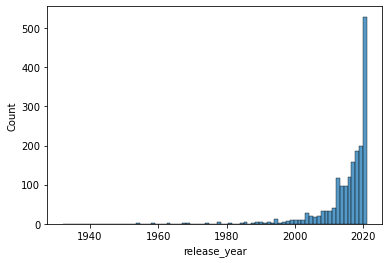

In [58]:
sns.histplot(a['release_year'])

In [59]:
a['director'].unique()

array(['Mark Knight'], dtype=object)

In [61]:
a['title'].value_counts()

Leo the Truck                                    1
Catastrophe                                      1
"The Paramedic Angel"                            1
Slopestyle TV                                    1
Tommy Little: Self-Diagnosed Genius              1
                                                ..
The Spot 313                                     1
RIDE ON TIME                                     1
BANANA FISH                                      1
Care Bears: Unlock the Music - Songs for Kids    1
The Neighbors [English Subbed] (4K UHD)          1
Name: title, Length: 1854, dtype: int64

In [62]:
a.groupby(['release_year'])['title'].value_counts()

release_year  title                                    
1932          Last Frontier                                1
1936          The Best of The Three Stooges in Color!      1
1945          Jungle Queen: 2K Restored Special Edition    1
1946          Basil Rathbone Sherlock Holmes in Color!     1
1954          Life with Elizabeth                          1
                                                          ..
2021          Wild & Free: Florianópolis                   1
              Word of Honor                                1
              X-Ray 1C Test Title                          1
              Yes & Yoga                                   1
              YoYo                                         1
Name: title, Length: 1854, dtype: int64

In [63]:
a['duration'].agg([max,min])

max    9 Seasons
min     1 Season
Name: duration, dtype: object

In [90]:
a['rating'].value_counts()

ALL      280
16+      275
13+      274
TV-14    208
TV-PG    169
18+      146
TV-NR    105
7+        97
TV-G      81
TV-MA     77
TV-Y      74
TV-Y7     39
NR        29
Name: rating, dtype: int64

In [73]:
pd.DataFrame(a.groupby(['title','rating'])['listed_in'].value_counts())

,,,listed_in
title,rating,listed_in,
"""The Paramedic Angel""",ALL,Drama,1
#IGotThis,TV-PG,Drama,1
#IMomSoHard Live,16+,"Arts, Entertainment, and Culture",1
#Lagira de #eldisco,TV-G,Music Videos and Concerts,1
#WASHED,18+,"Comedy, Drama",1
...,...,...,...
Zo Zo Zombie: Mini-Series,TV-Y7,"Action, Anime, Comedy",1
Zoboomafoo,TV-Y,Kids,1
Zoo Babies,ALL,"Kids, Special Interest",1


In [96]:
# Only one director in TV Shows
pd.DataFrame(a.groupby(['director'])['cast'].value_counts())

cast
director    cast                                                    
Mark Knight Maggie Binkley                                       470
            1                                                     18
            Rick Stein                                             4
            Shuhei Nomura, Yuki Morinaga, Kai Inowaki, Atsu...     4
            Jagapati Babu, Navdeep, Sidhu, Swetha Basu Pras...     3
...                                                              ...
            various                                                1
            Álex González, Verónica Echegui, Andrea Bosca          1
            Önem Pişkin, Ahmet Ataman, Mihca Kılıç, Emre Gü...     1
            アンドレ･ロビンソン, カリ･ワールグレン, トム･ケニー                          1
            マティアス・シュヴァイクヘーファー, アレクサンドラ・マリア・ララ, ミヒャエル・ランデス, ...     1

[1320 rows x 1 columns]

In [79]:
b = df.iloc[np.where(df['type']=='Movie')]

In [80]:
b

,show_id,type,title,director,cast,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...
9660,s9661,Movie,The Man in the Hat,"John-Paul Davidson, Stephen Warbeck","Ciaran Hinds, Stephen Dillane, Maïwenn",2021,13+,96 min,Comedy,The Man in the Hat journeys through France in ...
9662,s9663,Movie,River,Emily Skye,"Mary Cameron Rogers, Alexandra Rose, Rob Marsh...",2021,16+,93 min,"Drama, Science Fiction, Suspense","River is a grounded Sci-Fi mystery Thriller, t..."
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",1940,7+,60 min,Comedy,New York City street principles get an East Si...
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."


In [82]:
b['release_year'].value_counts()

2021    1139
2020     736
2019     730
2018     438
2017     404
        ... 
1926       2
1922       2
1927       1
1923       1
1924       1
Name: release_year, Length: 100, dtype: int64

In [83]:
b['release_year'].agg([max,min])

max    2021
min    1920
Name: release_year, dtype: int64

<AxesSubplot:xlabel='release_year', ylabel='Count'>

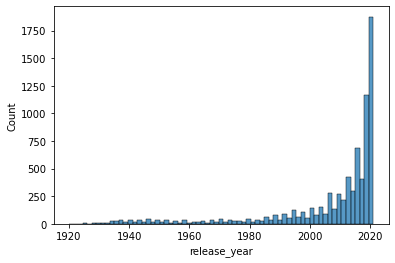

In [84]:
sns.histplot(b['release_year'])

In [85]:
b['director'].unique()

array(['Don McKellar', 'Girish Joshi', 'Josh Webber', ...,
       'John-Paul Davidson, Stephen Warbeck', 'Emily Skye',
       'Steve Barker'], dtype=object)

In [86]:
b['title'].value_counts()

Teraa Surroor                                        1
Champ Against Champ                                  1
The Darkness                                         1
The Social Network                                   1
#Home (4K UHD)                                       1
                                                    ..
Zoe                                                  1
Tom Clancy's The Division: Agent Origins (4K UHD)    1
Dakota                                               1
Joyride                                              1
Dil Hai Tumhara                                      1
Name: title, Length: 7814, dtype: int64

In [87]:
b.groupby(['release_year'])['title'].value_counts()

release_year  title                          
1920          Nomads Of The North                1
              Pollyanna                          1
              Within Our Gates                   1
1922          One Exciting Night                 1
              Robin Hood (Silent)                1
                                                ..
2021          Yuvarathnaa (Tamil)                1
              Yuvarathnaa (Telugu)               1
              Zara Si Bhool - A Small Mistake    1
              Zebra Girl                         1
              Zombie: I Eat Your Skin            1
Name: title, Length: 7814, dtype: int64

In [88]:
b['duration'].agg([max,min])

max    99 min
min     0 min
Name: duration, dtype: object

In [92]:
b['rating'].value_counts()

13+         2180
16+         1272
18+         1097
R           1010
ALL          988
PG-13        393
7+           288
PG           253
NR           194
G             93
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: rating, dtype: int64

In [93]:
pd.DataFrame(b.groupby(['title','rating'])['listed_in'].value_counts())

,,,listed_in
title,rating,listed_in,
"""Mixed Up""",16+,"Drama, Romance",1
#Home,13+,Drama,1
#Home (4K UHD),13+,Drama,1
#Lucky Number,13+,Comedy,1
#Unfit: The Psychology of Donald Trump,13+,"Documentary, Drama",1
...,...,...,...
Zombie Strippers,R,"Comedy, Horror, Science Fiction",1
Zombie Warz: Falls The Shadow,18+,"Action, Horror",1
Zombie: I Eat Your Skin,16+,Horror,1


In [154]:
i = df.iloc[np.where(df['country']=='India')]
i

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,2021,3
107,s108,Movie,Whoop!,Kreeti Gogia,Abish Mathew,India,2021-03-30,2018,18+,64 min,"Arts, Entertainment, and Culture",Abish Mathew is the world's greatest stand-up ...,2021,3
142,s143,Movie,Wedding Cha Shinema,Saleel Kulkarni,"Shivraj Waichal, Rucha Inamdar, Mukta Barve, P...",India,2021-03-30,2019,ALL,138 min,"Comedy, International",An aspiring filmmaker reluctantly takes up the...,2021,3
178,s179,Movie,Viswasam,Siva,"Ajith Kumar, Nayanthara",India,2021-03-30,2019,13+,151 min,"Action, Drama, International","A village ruffian, who settles disputes in his...",2021,3
180,s181,Movie,Virus,Aashiq Abu,"Revathy, Kunchako Boban, Parvathy Thiruvoth",India,2021-03-30,2019,ALL,149 min,"Drama, Science Fiction, Suspense","Virus is a fiction based on true events, revol...",2021,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7505,s7506,Movie,The Priest (Telugu),Jofin T. Chacko,"Mammootty, Manju Warrier, Ameya Mathew, Nikhil...",India,2021-03-30,2021,13+,145 min,Suspense,"Father Carmen, a priest, joins hands with the ...",2021,3
8366,s8367,Movie,Aashiqui 2,Mohit Suri,"Aditya Roy Kapoor, Shraddha Kapoor, Shaad Rand...",India,2021-03-30,2013,ALL,127 min,"International, Romance",Rahul loses his fans and fame due to alcoholis...,2021,3
8569,s8570,Movie,The Priest (Tamil),Jofin T. Chacko,"Mammootty, Manju Warrier, Ameya Mathew, Nikhil...",India,2021-03-30,2021,13+,145 min,Suspense,"Father Carmen, a priest, joins hands with the ...",2021,3
8825,s8826,Movie,Sunny (4K UHD),Ranjith Sankar,Jayasurya,India,2021-03-30,2021,PG-13,93 min,"Drama, Suspense","The life of a failed musician, sunny takes a d...",2021,3


In [155]:
i['type'].value_counts()

Movie      213
TV Show     16
Name: type, dtype: int64

In [156]:
i[i['type']=='TV Show']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
469,s470,TV Show,The Remix,Mark Knight,"Akhil Talreja, Amit Trivedi, Karan Tacker, Kry...",India,2021-03-30,2018,13+,1 Season,"International, Music Videos and Concerts, Unsc...",The Remix is the new sound of Indian music! On...,2021,3
814,s815,TV Show,Tandav,Mark Knight,"Saif Ali Khan, Dimple Kapadia, Tigmanshu Dhuli...",India,2021-03-30,2021,16+,1 Season,Drama,Tandav is the coming together of different wor...,2021,3
937,s938,TV Show,Sons of the Soil : Jaipur Pink Panthers,Mark Knight,Abhishek Bachchan,India,2021-03-30,2020,13+,1 Season,"Documentary, Drama, Sports",As Kabaddi’s popularity explodes across India ...,2021,3
1397,s1398,TV Show,Paatal Lok,Mark Knight,"Jaideep Ahlawat, Neeraj Kabi, Gul Panag, Swast...",India,2021-03-30,2020,18+,1 Season,"Drama, International",A down and out cop lands the case of a lifetim...,2021,3
1420,s1421,TV Show,One Mic Stand,Mark Knight,"Sapan Verma, Bhuvan Bam, Taapsee Pannu, Richa ...",India,2021-03-30,2019,16+,1 Season,"Arts, Entertainment, and Culture, Comedy, Inte...","This season, Sapan Verma brings on Bhuvan Bam,...",2021,3
1651,s1652,TV Show,Mirzapur,Mark Knight,"Ali Fazal, Shweta Tripathi Sharma, Pankaj Trip...",India,2021-03-30,2020,16+,2 Seasons,"Action, Drama, Suspense","In Mirzapur, revenge runs darker than blood. T...",2021,3
1748,s1749,TV Show,Man's World,Mark Knight,"Gaurav Pandey, Gurpreet Saini, Shikha Talsania...",India,2021-03-30,2015,16+,1 Season,Comedy,"What if women treated men, the way men treat w...",2021,3
1774,s1775,TV Show,Made In Heaven,Mark Knight,"Shivani Raghuvanshi, Kalki Koechlin, Shashank ...",India,2021-03-30,2019,16+,1 Season,"Drama, International",Made In Heaven chronicles the lives of Tara an...,2021,3
2032,s2033,TV Show,Jestination Unknown,Mark Knight,"Vir Das, Amit Tandon, Amogh Ranadive, Anu Meno...",India,2021-03-30,2019,16+,1 Season,"Arts, Entertainment, and Culture, Comedy, Unsc...",Vir Das travels across India with his friends ...,2021,3
2102,s2103,TV Show,Inside Edge,Mark Knight,"Richa Chadha, Vivek Anand Oberoi, Angad Bedi, ...",India,2021-03-30,2019,18+,2 Seasons,"Drama, International, Sports","In the next edition of the PPL, a volatile Vay...",2021,3


In [157]:
i[i['type']=='Movie']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,2021,3
107,s108,Movie,Whoop!,Kreeti Gogia,Abish Mathew,India,2021-03-30,2018,18+,64 min,"Arts, Entertainment, and Culture",Abish Mathew is the world's greatest stand-up ...,2021,3
142,s143,Movie,Wedding Cha Shinema,Saleel Kulkarni,"Shivraj Waichal, Rucha Inamdar, Mukta Barve, P...",India,2021-03-30,2019,ALL,138 min,"Comedy, International",An aspiring filmmaker reluctantly takes up the...,2021,3
178,s179,Movie,Viswasam,Siva,"Ajith Kumar, Nayanthara",India,2021-03-30,2019,13+,151 min,"Action, Drama, International","A village ruffian, who settles disputes in his...",2021,3
180,s181,Movie,Virus,Aashiq Abu,"Revathy, Kunchako Boban, Parvathy Thiruvoth",India,2021-03-30,2019,ALL,149 min,"Drama, Science Fiction, Suspense","Virus is a fiction based on true events, revol...",2021,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7505,s7506,Movie,The Priest (Telugu),Jofin T. Chacko,"Mammootty, Manju Warrier, Ameya Mathew, Nikhil...",India,2021-03-30,2021,13+,145 min,Suspense,"Father Carmen, a priest, joins hands with the ...",2021,3
8366,s8367,Movie,Aashiqui 2,Mohit Suri,"Aditya Roy Kapoor, Shraddha Kapoor, Shaad Rand...",India,2021-03-30,2013,ALL,127 min,"International, Romance",Rahul loses his fans and fame due to alcoholis...,2021,3
8569,s8570,Movie,The Priest (Tamil),Jofin T. Chacko,"Mammootty, Manju Warrier, Ameya Mathew, Nikhil...",India,2021-03-30,2021,13+,145 min,Suspense,"Father Carmen, a priest, joins hands with the ...",2021,3
8825,s8826,Movie,Sunny (4K UHD),Ranjith Sankar,Jayasurya,India,2021-03-30,2021,PG-13,93 min,"Drama, Suspense","The life of a failed musician, sunny takes a d...",2021,3


In [158]:
i['rating'].value_counts()

13+         105
ALL          46
16+          39
18+          20
NR           10
7+            4
PG-13         3
PG            1
NOT_RATE      1
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='Count'>

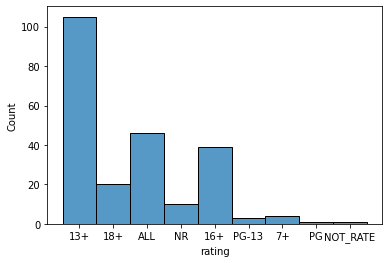

In [159]:
sns.histplot(i['rating'])

In [161]:
i['year'].unique()

array([2021], dtype=int64)

In [162]:
i.groupby(['director'])['title'].value_counts()

director         title           
Aashiq Abu       Virus               1
Abhinay Deo      Blackmail           1
Abhishek Kapoor  Rock On             1
Abhishek Varman  Kalank              1
Aditya Chopra    Befikre             1
                                    ..
Yash Chopra      Jab Tak Hai Jaan    1
                 Lamhe               1
                 Mashaal             1
                 Silsila             1
Zakariya         Halal Love Story    1
Name: title, Length: 229, dtype: int64

In [164]:
i['release_year'].min()

1973

In [166]:
# it was the most oldest movie in india
i.iloc[np.where(i['release_year']==1973)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
5296,s5297,Movie,Daag,Yash Chopra,"Rajesh Khanna, Sharmila Tagore, Rakhee Gulzar,...",India,2021-03-30,1973,7+,146 min,"Drama, International",Sunil (Rajesh Khanna) is forced to leave behin...,2021,3


In [167]:
i['release_year'].max()

2021

In [168]:
i.iloc[np.where(i['release_year']==2021)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
814,s815,TV Show,Tandav,Mark Knight,"Saif Ali Khan, Dimple Kapadia, Tigmanshu Dhuli...",India,2021-03-30,2021,16+,1 Season,Drama,Tandav is the coming together of different wor...,2021,3
1046,s1047,Movie,Shaadi Mubarak,Padmasri,"Sagar RK Naidu, Drishya Raghunath",India,2021-03-30,2021,ALL,133 min,"Comedy, Drama","Madhav, an introverted software employee who g...",2021,3
1965,s1966,Movie,Kapatadhaari (4K UHD),Pradeep Krishnamoorthy,"Sumanth, Nanditha Swetha, Nasser, JP",India,2021-03-30,2021,13+,137 min,Suspense,A passionate traffic police who is bored of hi...,2021,3
1966,s1967,Movie,Kapatadhaari,Pradeep Krishnamoorthy,"Sumanth, Nanditha Swetha, Nasser, JP",India,2021-03-30,2021,NR,137 min,Suspense,A passionate traffic police who is bored of hi...,2021,3
1976,s1977,Movie,Kabadadaari (4K UHD),Pradeep Krishnamoorthy,"Sibi Sathyaraj, Nanditha Swetha, Nasser, JP",India,2021-03-30,2021,16+,137 min,Suspense,A passionate traffic police who is bored of hi...,2021,3
1977,s1978,Movie,Kabadadaari,Pradeep Krishnamoorthy,"Sibi Sathyaraj, Nanditha Swetha, Nasser, JP",India,2021-03-30,2021,16+,137 min,Suspense,A passionate traffic police who is bored of hi...,2021,3
2603,s2604,Movie,Drishyam 2,Jeethu Joseph,"Mohanlal, Meena, Siddique, Murali Gopy, Asha S...",India,2021-03-30,2021,13+,153 min,Drama,A gripping tale of an investigation and a fami...,2021,3
3620,s3621,Movie,Maara,Dhilip Kumar,"R.Madhavan, Shraddha Srinath, Sshivada, Mouli,...",India,2021-03-30,2021,13+,150 min,Romance,When Paaru sees a fairy tale she heard from a ...,2021,3
3696,s3697,Movie,Anbirkiniyal,Gokul,"Keerthi Pandian, Arun Pandian, Praveen Raja",India,2021-03-30,2021,ALL,123 min,"Drama, Suspense",True to her name the protagonist is a lovable ...,2021,3
4358,s4359,Movie,The Priest,Jofin T. Chacko,"Mammootty, Nikhila Vimal, Manju Warrier",India,2021-03-30,2021,NR,145 min,"Horror, Suspense",A priest and a police officer are trying to so...,2021,3


In [169]:
i['director'].unique()

array(['Girish Joshi', 'Kreeti Gogia', 'Saleel Kulkarni', 'Siva',
       'Aashiq Abu', 'Saurabh Varma', 'Sanket Prakash Pavse',
       'Vikram Sirikonda', 'Ali Abbas Zafar', 'Mark Knight',
       'Punit Malhotra', 'Luv Ranjan', 'Vikram Phadnis', 'Neville Shah',
       'Teja', 'Anu Menon', 'Padmasri', 'Chandoo Mondeti', 'Sethuraman',
       'Ravi Varma', 'Sukumar', 'Meghna Gulzar', 'Rohin Venkatesan',
       'Prosit Roy', 'Anees Bazmee', 'Sanjay Leela Bhansali',
       'M.D. Sridhar', 'Nitin Kakkar', 'K. Selvaraghavan',
       'Nenshad H. Karbhari', 'Jayesh Pradhan', 'Satish Rajwade',
       'Simerjit Singh', 'Nelson Venkatesan', 'Mukul Abhyankar',
       'Vinod Anantoju', 'Venu Sriram', 'Ritesh Rana', 'Bumpy',
       'Raghu Samarth', 'Anurag Singh', 'Pradeep Krishnamoorthy',
       'Abhishek Varman', 'Pandiraj', 'Prerna Wadhawan', 'Anuraj Manohar',
       'Habib Faisal', 'P.S. Mithran', 'Trinadha Rao Nakkina',
       'Srijit Mukherji', 'Shoojit Sircar', 'Mainak Bhaumik',
       'Sashi 

In [170]:
i['date_added'].value_counts()

2021-03-30    228
2021-05-19      1
Name: date_added, dtype: int64

<AxesSubplot:>

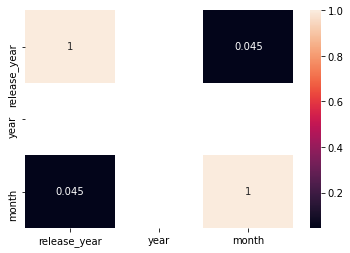

In [172]:
corr_mat = df.corr()
sns.heatmap(corr_mat , annot = True)